# Introduction to Machine Learning (CSCI-UA.473)

## Lab 1: Introduction
### Date: September 16th, 2021


### Name: Jerry Jia
### Email: jerryjia@nyu.edu


# Importing packages

We will first import some packages. An error importing one of these means you do not have it downloaded or it is not downloaded in the correct place. To install a package you can run:

* If you are using pip3: ```pip3 install your_package_name```

* If you are using conda: ```conda install your_package_name```

In [1]:
# Numerical/scientific computing packages.
import numpy
import scipy

# Machine learning package.
import sklearn

# For computing gradients.
import autograd.numpy as np
from autograd import grad

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

print('Finished successfully loading packages')


Finished successfully loading packages


# Checking the version of the packages

Sometimes we will need specific versions of a package so that all of our code is compatible. You can check which version you have installed below, but usually the latest version will be fine.

In [2]:
numpy.__version__

'1.19.2'

In [3]:
scipy.__version__

'1.6.2'

In [4]:
sklearn.__version__

'0.24.2'

In [5]:
matplotlib.__version__

'3.4.2'

In [6]:
pickle.format_version

'4.0'

# Using Numpy

Numpy contains many useful functions for doing numerical operations on vectors and matrices.  The fundamental object here is the numpy array.

## Matrix and vector operations

In [7]:
# Vectors are represented by 1-D numpy arrays.

x = np.array([1, 0])
print('x = ', x)

x =  [1 0]


In [8]:
# Matrices are represented by 2-D numpy arrays.

A = np.asarray([[1, 2], [3, 4]])
print('A = ', A)

A =  [[1 2]
 [3 4]]


In [9]:
# We can get the shape of the array with...
print('A has shape ', A.shape)

# We can also get a certain row or column with...
print('First column of A = ', A[:,0])
print('Second row of A = ', A[1,:])

# It is also sometimes useful to reshape our data (for example when using sklearn later)
print('A as a vector: ', A.reshape((4,)))

A has shape  (2, 2)
First column of A =  [1 3]
Second row of A =  [3 4]
A as a vector:  [1 2 3 4]


In [10]:
# Multiply the matrix and the vector.
y1 = A.dot(x)
print('y1 = ', y1)

# Equivalently,
y2 = A @ x
print('y2 = ', y2)

y1 =  [1 3]
y2 =  [1 3]


In [11]:
# This is different from simply multiplying the two. 
# Note that since x has shape (2,) while A has shape (2,2), 
# x is copied twice to match A's shape before performing the operation
y3 = A * x
print('y3 = ', y3)

# This is called "broadcasting", and the smaller array is “broadcast” across 
# the larger array so that they have compatible shapes. 
# Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. 
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print("a x b = ", a * b)

y3 =  [[1 0]
 [3 0]]
a x b =  [2. 4. 6.]


In [12]:
# Matrix multiplication AB.
B = np.asarray([[5, 6], [7, 8]])
C1 = np.matmul(A, B)
print('C1 = ', C1)

# Equivalently,
C2 = A @ B
print('C2 = ', C2)


C1 =  [[19 22]
 [43 50]]
C2 =  [[19 22]
 [43 50]]


In [13]:
# Initializing a random matrix of size 3 x 4
R = np.random.rand(3,4)
print('R = ', R)

R =  [[0.42679096 0.09651046 0.71086286 0.71756579]
 [0.66364742 0.92671676 0.42968359 0.02531577]
 [0.46277213 0.57454481 0.46869746 0.60471266]]



## Linear algebra in Numpy

Numpy also contains many useful linear algebra functions for solving systems of equations, computing inverses, norms, eigenvalues, etc.  Below is an example where we use it to solve a system of linear equations $Ax = b$ for the vector $x$.

$$
\begin{bmatrix}1 & 2 & 4 \\ -2 & 3 & 1 \\ -4 & 1 & 2\end{bmatrix}\begin{bmatrix}x_1 \\x_2 \\x_3 \end{bmatrix} = \begin{bmatrix}18 \\ 5 \\ 0\end{bmatrix}
$$

In [14]:
# Set up the equations.
A = np.array([[1, 2, 4], [-2, 3, 1], [-4, 1, 2]])
b = np.array([18, 5, 0])

# Solve the system.
x = np.linalg.solve(A, b)
print('x = ', x)

# Verify the solution by checking the residual is 0.
r = A @ x - b
print('r = ', r)

x =  [2. 2. 3.]
r =  [0. 0. 0.]


We can also invert the matrix $A$ and then multiply, but this is usually a bad idea for bigger systems.

In [15]:
A_inv = np.linalg.inv(A)

x = A_inv @ b
print('x = ', x)

# Compute the Euclidean norm of the residual.  It should be 0.
norm_r = np.linalg.norm(A @ x - b)
print('norm_r = ', norm_r)

x =  [2. 2. 3.]
norm_r =  0.0


# Using Matplotlib

## Plotting functions.

Matplotlib is convenient for plotting data and functions.  For example we can plot the function

$$
f(x) = \sin(x)
$$

by evaluating it on a grid of points.

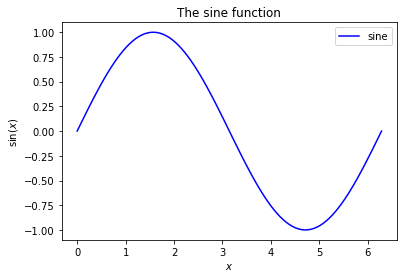

In [16]:
# Define the function.
f = lambda x: np.sin(x)

# Get the points we will plot.
x = np.linspace(0, 2*np.pi, 100) # 100 evenly spaced points between 0 and 2pi.

# Now plot the results.
plt.figure(1)
plt.plot(x, f(x), 'b-', label = r'sine')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')
plt.title(r'The sine function')
plt.legend();

## Surface plots.

We can also plot surfaces, such as 

$$
z(x,y) = x^2 + y^2
$$

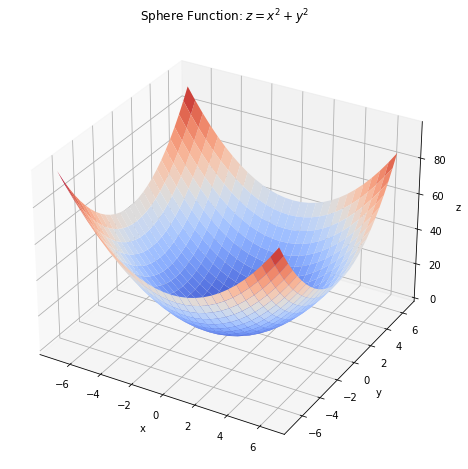

In [17]:
# create the grid data for the plot along with z values at each point
x, y = np.meshgrid(np.arange(-7, 7, 0.5), np.arange(-7, 7, 0.5))
z = x**2 + y**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title(r'Sphere Function: $z = x^2 + y^2$');

# Using Pickle

Pickle is a package for saving (serializing) Python objects and using them again later. This will be useful if we want to hold on to a model we have already trained since for many algorithms the training/learning phase is the most expensive.

Below is a short demonstration for a dummy object.

In [18]:
# Define some object.
class foo:  
    def __init__(self):
        # Give it a random number.
        self.a = np.random.rand()

# Create the object.
foo_1 = foo()
print('Random number = ', foo_1.a)

# Save the object.
# The "with" statement ensures that resources are released afterwards (here: files are closed)
fname = 'foo.p'
with open(fname, 'wb') as fp:
    pickle.dump(foo_1, fp)

# Now load the object.
with open(fname, 'rb') as fp:
    foo_2 = pickle.load(fp)

print('Should be the same random number = ', foo_2.a)

Random number =  0.0018872985200296677
Should be the same random number =  0.0018872985200296677


# Using Autograd

Autograd is a package for automatic differentiation.  ``autograd.numpy`` is a wrapper for Numpy which contains the same basic operations.  In most machine learning algorithms we need the gradient of a certain loss function to fit our model to the given data.  Autograd computes this gradient automatically for us so that we may use methods such as gradient descent.  A popular function used in logistic regression as well as neural nets is the sigmoid function

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The derivative is given by

$$
\sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x) (1 - \sigma(x))
$$

We could either compute this derivative by hand and then hard code it explicitly, or we could just call autograd.

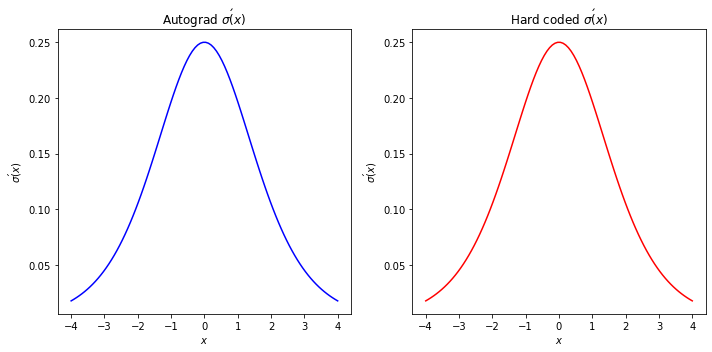

In [19]:
# Define the sigmoid function.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hard code the gradient of the sigmoid function.
def grad_sigmoid(x):
    y = sigmoid(x)
    return y * (1 - y)

# Evaluate the gradient using autograd.
grad_sig = grad(sigmoid)

# Plot the two gradients side by side.
x = np.linspace(-4, 4, 100)


# We'll have 2 plots side by side.
fig = plt.figure(3, figsize = (10, 5))

# First plot the autograd derivative.
ax1 = plt.subplot(121) # create a figure with 1 row and 2 columns and get the axis 
y1 = np.asarray([grad_sig(x[i]) for i in range(len(x))])
ax1.plot(x, y1, 'b')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sigma\'(x)$')
ax1.set_title(r'Autograd $\sigma\'(x)$')

# Second plot the hard-coded derivative.
ax2 = plt.subplot(122)
y2 = grad_sigmoid(x)
ax2.plot(x, y2, 'r')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\sigma\'(x)$')
ax2.set_title(r'Hard coded $\sigma\'(x)$')

plt.tight_layout();

# Using Sci-kit Learn

Sci-kit learn is a Python package that contains many different machine learning algorithms.

## Linear regression 
A toy example where we fit a linear regression model to some synthetic data.

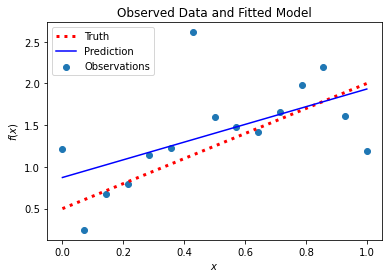

In [20]:
from sklearn.linear_model import LinearRegression

# True function we want to approximate.
f = lambda x: 1.5 * x + 0.5

# Generate some fake data.
N = 15 # Number of data points.
x = np.linspace(0, 1, N)
y = f(x) + 0.5 * np.random.randn(N) # Observations that are corrupted by random noise.


# Now lets fit a linear regression model to our data.
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Note that .reshape(-1, 1): The -1 means "figure out what number is needed there".
# For example, in our case, the -1 becomes N because we have an array with N entries
# Note that .reshape(-1, 1) is different from .reshape(-1, ). The first is a 2-dim array, the second a 1-dim array

# Plot the fitted model with the truth and the observations.
plt.figure(4)
plt.scatter(x, y, label = 'Observations')
plt.plot(x, f(x), 'r:', label = 'Truth', lw = 3)
plt.plot(x, model.predict(x.reshape(-1, 1)), 'b-', label = 'Prediction')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'Observed Data and Fitted Model')
plt.legend();

## K-Nearest neighbor classifier

Here's one more example where we use a kNN classifier to classify data into one of three classes $\{0,1,2\}$.  The kNN classifier assigns a label to a new point by looking at its $k$-nearest neighbors in the dataset and choosing the most common label among those.  As opposed to linear regression, here most of the work is done when we make a prediction and not when we fit the model.  For 2D data we can split the domain into different regions corresponding to how we would label new test data if it fell in that region.  These are called decision regions.

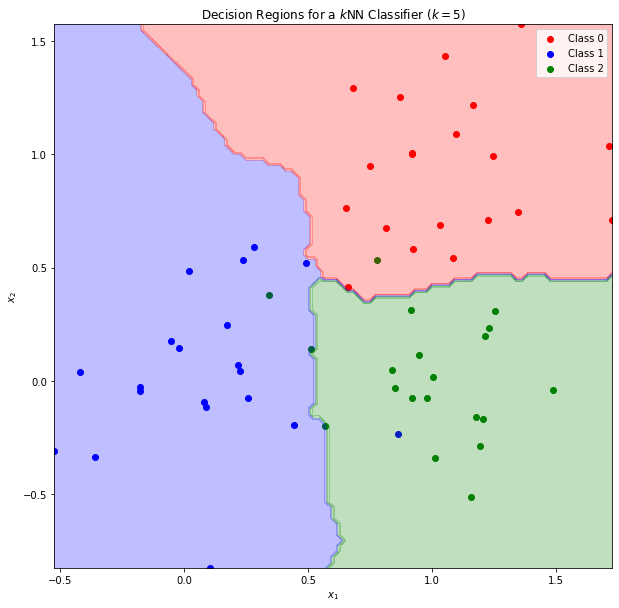

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Generate some fake data for each of the three classes.
N = 20 # Number of data points per class.
x0 = np.asarray([1, 1]) + 0.3*np.random.randn(2 * N).reshape((N, 2))
y0 = np.zeros(N)
x1 = np.asarray([0, 0]) + 0.3*np.random.randn(2 * N).reshape((N, 2))
y1 = np.ones(N)
x2 = np.asarray([1, 0]) + 0.3*np.random.randn(2 * N).reshape((N, 2))
y2 = 2 * np.ones(N)

# Organize the data so that it can be used by sklearn.
X = np.vstack([x0, x1, x2]) # vstack stacks arrays row-wise
y = np.concatenate([y0, y1, y2])  # concatenates arrays along one axis

# Fit the model by choosing the n nearest neighbors.
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X, y)

# Plot the data as well as the decision regions.
plt.figure(5, figsize = (10, 10))
# Plot the data.
plt.scatter(x0[:,0], x0[:,1], color = 'r', label = r'Class 0')
plt.scatter(x1[:,0], x1[:,1], color = 'b', label = r'Class 1')
plt.scatter(x2[:,0], x2[:,1], color = 'g', label = r'Class 2')

# Plot the decision regions.

#Setup marker generator and color map
colors = ('red','blue','green')
cmap = ListedColormap(colors)

# Mesh grid of points.
xx_min, xx_max = X[:, 0].min(), X[:, 0].max()
yy_min, yy_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 100), np.linspace(yy_min, yy_max, 100))


# Make the predictions.
# xx.ravel() generates a 1D array from the potentially d-dim array xx (xx.ravel() = xx(:) in Matlab)
Z = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.25, cmap=cmap) # alpha parameter sets transparency 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
str_title = 'Decision Regions for a $k$NN Classifier ($k = {:d}$)'.format(k)
plt.title(str_title)
plt.legend();

# Image as data
We will now load some image data as a numpy array and play around with it including displaying it and doing some exploratory data analysis. We'll show how to use standard Python libraries to visualize and distort images, switch between matrix and vector representations. We will use the CIFAR-10 object recognition data set as an example.

## Visualize random matrices as images

Before looking at real data, let us introduce the basic image data construct in Python. A color image is generally a 3-dimensional array with dimensions: NxMx3. The last dimension is the color channel, and the first two represent the X and Y grid of the image. The values are typically integer-valued pixel intensities for each color channel, with values between 0 and 255. The first thing we'll do is generate a random image and look at it.

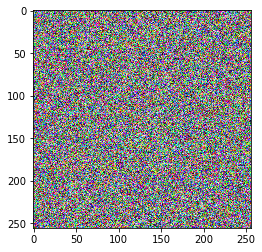

In [22]:
# generate a 3-dimensional random array of integers in the range of [0,255]
x = 256
y = 256
d = 3

rand_img = np.random.randint(0, 256, size=(x, y, d), dtype='int')
img = plt.imshow(rand_img, interpolation='nearest')

## Visualize the CIFAR-10 dataset

We now load the CIFAR data, convert it into a matrix, and visualize the results. The data can be downloaded from: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [23]:
#Student: change the data directory to where you have the data
data_dir = '/Users/spchopra/research/data/cifar-10-batches-py/' # change the directory to where you will store the data
cifar_data_file = data_dir + 'data_batch_1'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_data = unpickle(cifar_data_file)
images = cifar_data.get(b"data")
images = images.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/spchopra/research/data/cifar-10-batches-py/data_batch_1'

In [ ]:
# loop over some random images and display them on the grid
fig, axes1 = plt.subplots(5, 5, figsize=(10, 10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(images)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(images[i:i+1][0])

# Submitting your work

To submit your work first make sure your name is written at the top and all plots/outputs are visible.  Then go to File >> Download as ... >> PDF via LaTeX (.pdf).  Finally, submit the pdf to Brightspace. 